#### *Link to data*

https://www.kaggle.com/datasets/ramjasmaurya/top-250s-in-imdb?select=imdb+%281000+movies%29+in+june+2022.csv

#### *gross collection data*

https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time

## Project Overview
### The dataset is about 1000 Top Rated Movies on IMDB.com (aka. Internet Movie Database) as of June 2022, containing features including audiences' rating, genre, year, casting, vote, gross collection etc.

### Analyses are to be done in terms of different aspects, based on the mentioned features.

# Questions:

## *i. Overall Analyses:*
#### Q1. What were the trends of some important film features since 1920's ? (e.g. no. of production, gross collection, runtime etc.)
#### Q2. Any correlations among IMDB ratings and other film features?
## *ii. In terms of popular popular genres and combinations:*
#### Q3. What genres or combinations of genres of films had higher proportions(more popular) BY DECADES?
#### Q4. What were the trends of 'Average Gross Collection' & 'Total no. of Productions' of films of those 'popular genres and combinations' BY DECADES?
#### Q5. Any correlations among features of films of those 'popular genres and combinations'?

## *iii. In terms of Directors:*
#### Q6. What were the 'Average IMDB Rating' VS 'Total no. of films directed' for each director? any correlation between them?
#### Q7. Compared to other films, did 'films that the directors also acted in' get either higher IMDB ratings or higher Gross Collection? or tend to have higher or shorter runtime?
#### Q8. Back to 'popular genres and combinations', Did they tend to get either higher IMDB ratings or higher Gross Collection than other films overall?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')
%matplotlib inline

In [3]:
df=pd.read_csv('imdb (1000 movies) in june 2022.csv')
df.head(3)

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M


#### change column names, and keep useful columns only

In [4]:
cols=['Ranking', 'Movie_Name', 'Year', 'Certificate', 'Runtime(Minutes)', 'Genre', 'Rating', 'Metascore', 'About',
      'Director', 'Actor_1', 'Actor_2', 'Actor_3', 'Actor_4', 'Votes', 'Gross_Collection(Million)']
df.columns=cols
df = df.drop(columns=['Certificate','About'])
df.sample(5)

,Ranking,Movie_Name,Year,Runtime(Minutes),Genre,Rating,Metascore,Director,Actor_1,Actor_2,Actor_3,Actor_4,Votes,Gross_Collection(Million)
432,433,The Graduate,-1967,106 min,"Comedy, Drama, Romance",8.0,83.0,Mike Nichols,Dustin Hoffman,Anne Bancroft,Katharine Ross,William Daniels,"270,582",$104.95M
421,422,Young Frankenstein,-1974,106 min,Comedy,8.0,80.0,Mel Brooks,Gene Wilder,Madeline Kahn,Marty Feldman,Peter Boyle,"156,395",$86.30M
158,159,My Father and My Son,-2005,112 min,"Drama, Family",8.2,NaN,Cagan Irmak,Çetin Tekindor,Fikret Kuskan,Hümeyra,Ege Tanman,"85,867",NaN
139,140,Andhadhun,-2018,139 min,"Comedy, Crime, Music",8.2,NaN,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte,Anil Dhawan,"89,987",$1.37M
197,198,All About Eve,-1950,138 min,Drama,8.2,98.0,Joseph L. Mankiewicz,Bette Davis,Anne Baxter,George Sanders,Celeste Holm,"130,033",$0.01M


In [5]:
print(df.info(),df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ranking                    1000 non-null   object 
 1   Movie_Name                 1000 non-null   object 
 2   Year                       1000 non-null   object 
 3   Runtime(Minutes)           1000 non-null   object 
 4   Genre                      1000 non-null   object 
 5   Rating                     1000 non-null   float64
 6   Metascore                  837 non-null    float64
 7   Director                   1000 non-null   object 
 8   Actor_1                    1000 non-null   object 
 9   Actor_2                    1000 non-null   object 
 10  Actor_3                    1000 non-null   object 
 11  Actor_4                    1000 non-null   object 
 12  Votes                      1000 non-null   object 
 13  Gross_Collection(Million)  820 non-null    object

In [6]:
# quite a lot of films with no "gross_collection record or '$0.00M', let's have a look
df[(df['Gross_Collection(Million)'].isnull())|(df['Gross_Collection(Million)']=='$0.00M')].sample(5)

,Ranking,Movie_Name,Year,Runtime(Minutes),Genre,Rating,Metascore,Director,Actor_1,Actor_2,Actor_3,Actor_4,Votes,Gross_Collection(Million)
296,297,Barry Lyndon,-1975,185 min,"Adventure, Drama, War",8.1,89.0,Stanley Kubrick,Ryan O'Neal,Marisa Berenson,Patrick Magee,Hardy Krüger,"164,979",NaN
685,686,Kiki's Delivery Service,-1989,103 min,"Animation, Adventure, Family",7.8,83.0,Hayao Miyazaki,Kirsten Dunst,Minami Takayama,Rei Sakuma,Kappei Yamaguchi,"141,253",NaN
453,454,Kind Hearts and Coronets,-1949,106 min,"Comedy, Crime",8.0,NaN,Robert Hamer,Dennis Price,Alec Guinness,Valerie Hobson,Joan Greenwood,"37,190",NaN
437,438,The Exterminating Angel,-1962,95 min,"Drama, Fantasy",8.0,NaN,Luis Buñuel,Silvia Pinal,Jacqueline Andere,Enrique Rambal,José Baviera,"32,884",NaN
138,139,Tumbbad,-2018,104 min,"Drama, Fantasy, Horror",8.2,NaN,Rahi Anil Barve,Anand Gandhi,Adesh Prasad,Sohum Shah,Jyoti Malshe,"42,528",NaN


#### Films without 'Gross_collection' record may also have missing 'Metascore' records, and lower 'votes', therefore the analysis(e.g. when we group data by genre/years) may give biased findings if they are not fillered. 
## Only use films with 'gross_collection' records are to be used for fairer and more effective analysis.

In [7]:
# filter out rows without 'gross_collection' data
df=df[(df['Gross_Collection(Million)'].notnull())&(df['Gross_Collection(Million)']!='$0.00M')]

#### other cleaning processes

In [8]:
# change dtypes & getting rid of useless strings
df['Ranking']=df['Ranking'].astype('int64')
df['Year']=df['Year'].str.replace('-','')
df['Runtime(Minutes)']=df['Runtime(Minutes)'].str.replace(' min','').astype('float64')
df['Votes']=df['Votes'].str.replace(',','').astype('int64')
df['Gross_Collection(Million)']=df['Gross_Collection(Million)'].str.replace('$','')
df['Gross_Collection(Million)']=df['Gross_Collection(Million)'].str.replace('M','').astype('float64')

In [9]:
# a function to extract only numerical data from columns
def only_numerics(seq):
    seq_type= type(seq)
    return seq_type().join(filter(seq_type.isdigit, seq))

In [10]:
df['Year']=df['Year'].apply(only_numerics).astype('int64')

In [11]:
# separate 'genre' column into columns that contain one genre each,
# There is NO PARTICULAR ORDER among genre1-3
df['Genre_1']=df['Genre'].str.split(', ',expand=True)[0]
df['Genre_2']=df['Genre'].str.split(', ',expand=True)[1]
df['Genre_3']=df['Genre'].str.split(', ',expand=True)[2]
df['Count']=1
df=df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 997
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ranking                    817 non-null    int64  
 1   Movie_Name                 817 non-null    object 
 2   Year                       817 non-null    int64  
 3   Runtime(Minutes)           817 non-null    float64
 4   Genre                      817 non-null    object 
 5   Rating                     817 non-null    float64
 6   Metascore                  736 non-null    float64
 7   Director                   817 non-null    object 
 8   Actor_1                    817 non-null    object 
 9   Actor_2                    817 non-null    object 
 10  Actor_3                    817 non-null    object 
 11  Actor_4                    817 non-null    object 
 12  Votes                      817 non-null    int64  
 13  Gross_Collection(Million)  817 non-null    float64

In [13]:
# no method to work out average metascores & fill null values due to insufficient data
# therefore, metascore will not be mainly focused on in this analysis
df_year_meta=df.groupby(['Year'])['Metascore'].mean()
df_year_meta

Year
1921          NaN
1924          NaN
1925    97.000000
1926          NaN
1927    98.000000
          ...    
2017    79.153846
2018    74.846154
2019    81.285714
2020    72.000000
2021    72.500000
Name: Metascore, Length: 96, dtype: float64

## *i. Overall Analyses:*
#### Q1. What were the trends of some important film features since 1920's ? (e.g. no. of production, gross collection, runtime etc.)

In [14]:
# number of films by year
df_year_count=df.groupby('Year').count()
# Gross collection by year
df_year_gross=df.groupby(['Year'])['Gross_Collection(Million)'].sum()
# Average runtime in minutes by year
df_year_ave_runt=round(df.groupby('Year')['Runtime(Minutes)'].mean(),2)
# no. of votes by year
df_year_votes=df.groupby('Year')['Votes'].sum()

Text(0, 0.5, 'Total votes (Million)')

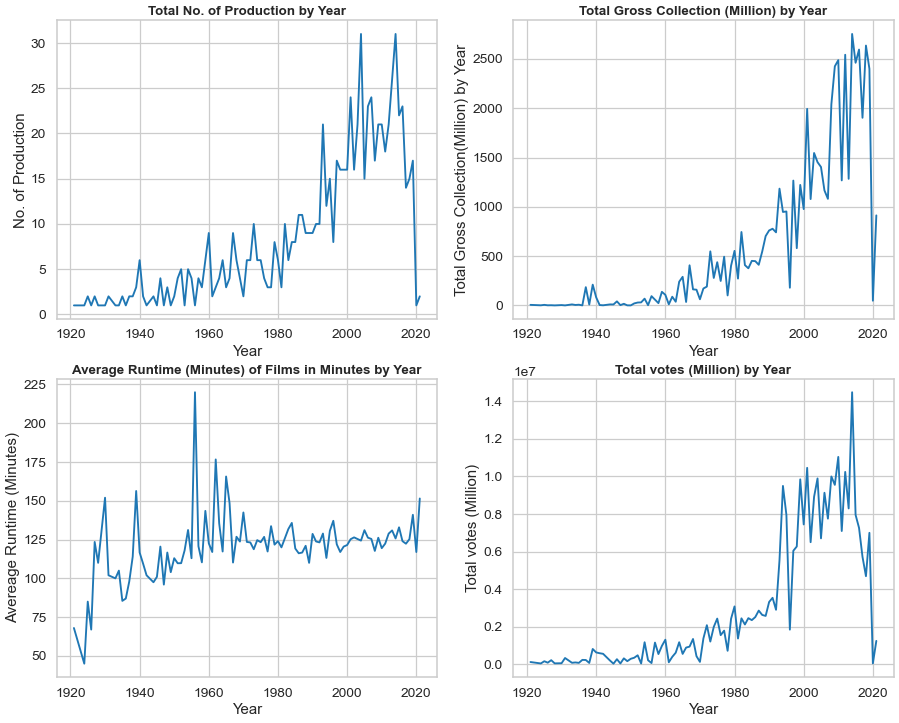

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(18,14.5), dpi=60, nrows=2, ncols=2)

sns.lineplot(data=df_year_count['Count'],ax=ax1)
sns.lineplot(data=df_year_gross,ax=ax2)
sns.lineplot(data=df_year_ave_runt,ax=ax3)
sns.lineplot(data=df_year_votes,ax=ax4)

ax1.set_title('Total No. of Production by Year', fontsize=16, fontweight ='bold')
ax2.set_title('Total Gross Collection (Million) by Year', fontsize=16, fontweight ='bold')
ax3.set_title('Average Runtime (Minutes) of Films in Minutes by Year', fontsize=16, fontweight ='bold')
ax4.set_title('Total votes (Million) by Year', fontsize=16, fontweight ='bold')

ax1.set_ylabel('No. of Production')
ax2.set_ylabel('Total Gross Collection(Million) by Year')
ax3.set_ylabel('Avereage Runtime (Minutes)')
ax4.set_ylabel('Total votes (Million)')

## Findings
#### Most of the features have been increasing by time overall, and reached their peaks between 2000 - 2020.
#### Some of the Films in the 1950's had significantly longer runtime in average(see below), but did not make significant effect on other features, or had higher ranking.

In [16]:
df[df['Year'].between(1950,1959)].sort_values('Runtime(Minutes)',ascending=False)[['Ranking','Movie_Name','Year','Runtime(Minutes)']].head(3)

,Ranking,Movie_Name,Year,Runtime(Minutes)
566,567,The Ten Commandments,1956,220.0
308,309,Ben-Hur,1959,212.0
32,33,Seven Samurai,1954,207.0


#### Q2. Any correlations among IMDB ratings and other film features?

r^2 of Rating VS Runtime in Minutes = 0.062.
r^2 of Rating VS No. of Votes = 0.324.
r^2 of Rating VS Gross_Collection(Million) = 0.012.
r^2 of Rating VS Metascore = 0.008.


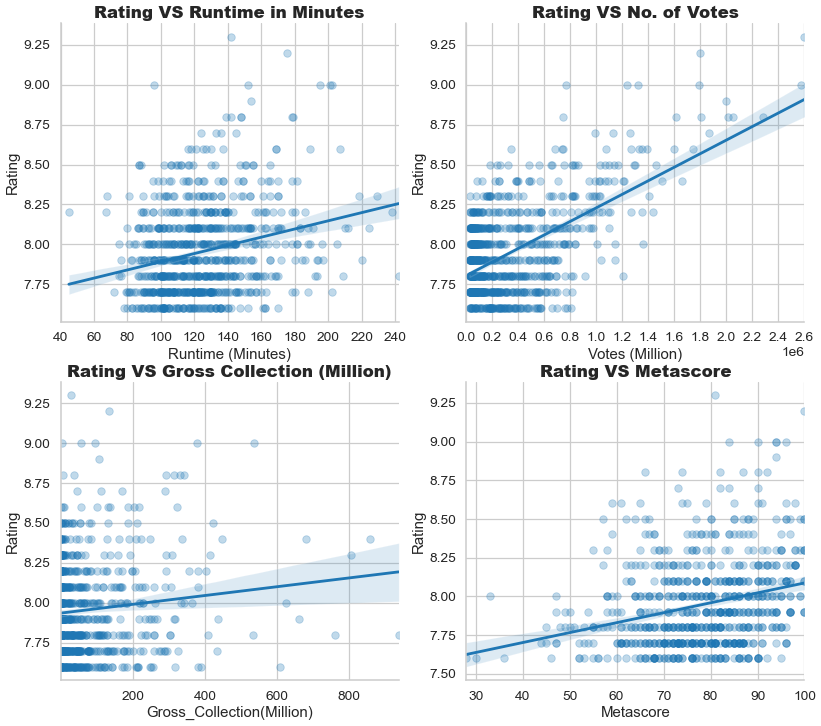

In [17]:
from sklearn.linear_model import LinearRegression 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(16,14.5), dpi=60, nrows=2, ncols=2)

x1=df['Runtime(Minutes)']
x2=df['Votes']
x3=df['Gross_Collection(Million)']
x4=df['Metascore']
y=df['Rating']

sns.regplot(x=x1, y=y, ax=ax1, scatter_kws={'alpha':0.28})
sns.regplot(x=x2, y=y, ax=ax2, scatter_kws={'alpha':0.28})
sns.regplot(x=x3, y=y, ax=ax3, scatter_kws={'alpha':0.28})
sns.regplot(x=x4, y=y, ax=ax4, scatter_kws={'alpha':0.28})

ax1.set_title('Rating VS Runtime in Minutes', fontsize=20, fontweight ='heavy')
ax1.set_xticks(range(40,260,20))
ax1.set_xlabel('Runtime (Minutes)')

ax2.set_title('Rating VS No. of Votes', fontsize=20, fontweight ='heavy')
ax2.set_xticks(range(0,2750000,200000))
ax2.set_xlabel('Votes (Million)')

ax3.set_title('Rating VS Gross Collection (Million)', fontsize=20, fontweight ='heavy')

ax4.set_title('Rating VS Metascore', fontsize=20, fontweight ='heavy')

# compute r^2 values
lin_reg_1=LinearRegression().fit(df[['Runtime(Minutes)']], y)
lin_reg_2=LinearRegression().fit(df[['Votes']], y)
lin_reg_3=LinearRegression().fit(df[['Gross_Collection(Million)']], y)
lin_reg_4=LinearRegression().fit(df[['Metascore']].notnull(), y)

r2_1=lin_reg_1.score(df[['Runtime(Minutes)']], y)
r2_2=lin_reg_2.score(df[['Votes']], y)
r2_3=lin_reg_3.score(df[['Gross_Collection(Million)']], y)
r2_4=lin_reg_4.score(df[['Metascore']].notnull(), y)

print(f'r^2 of Rating VS Runtime in Minutes = {round(r2_1,3)}.')
print(f'r^2 of Rating VS No. of Votes = {round(r2_2,3)}.')
print(f'r^2 of Rating VS Gross_Collection(Million) = {round(r2_3,3)}.')
print(f'r^2 of Rating VS Metascore = {round(r2_4,3)}.')

sns.despine()
plt.show()

### Findings
### IMDB Ratings have no strong correlations with other numerical features of films!!
#### Since a r^2 value below 0.4 indicates a weak correlation between 2 targeted features.

#### (r^2 >= 0.7 for strong correlations according to https://www.investopedia.com/terms/r/r-squared.asp)

## *ii. In terms of popular popular genres and combinations:*

In [18]:
# check what the most common genres are
display(df['Genre_1'].value_counts().nlargest(3),df['Genre_2'].value_counts().nlargest(3),df['Genre_3'].value_counts().nlargest(3))

Drama     229
Action    143
Comedy    128
Name: Genre_1, dtype: int64

Drama        276
Adventure     99
Crime         59
Name: Genre_2, dtype: int64

Drama       85
Thriller    79
Romance     64
Name: Genre_3, dtype: int64

### Most films had more than 1 genre, this could be a factor affecting ranking or gross collection of a film!!
#### Let's focus on the most popular film genre - 'Drama', and it's common possible combination with other genres


In [19]:
# check distributions of the most common genre the films fall into
Genre_list=['Drama','Action','Comedy','Crime','Adventure','Thriller','Romance']

for Genre in Genre_list:
    Genre_count=df[df['Genre'].str.contains(Genre)].shape[0]
    print(f'{Genre_count} films, i.e. {round(Genre_count/df.Genre.count()*100,2)}% of films are in "{Genre}" Genre. \n')

590 films, i.e. 72.22% of films are in "Drama" Genre. 

159 films, i.e. 19.46% of films are in "Action" Genre. 

192 films, i.e. 23.5% of films are in "Comedy" Genre. 

164 films, i.e. 20.07% of films are in "Crime" Genre. 

164 films, i.e. 20.07% of films are in "Adventure" Genre. 

104 films, i.e. 12.73% of films are in "Thriller" Genre. 

108 films, i.e. 13.22% of films are in "Romance" Genre. 



### 'Drama' genre is the most popular among all.
### Let's dig even deeper into the films that were of 'Drama' genre, and what their relationships among the other 4 most common genre were.

In [20]:
genre_1='Adventure'
genre_2='Action'
genre_3='Comedy'
genre_4='Crime'
genre_5='Drama'
dra_len=df[df['Genre'].str.contains(genre_5)].shape[0]
dra_only_len=df[df['Genre']==genre_5].shape[0]
adv_dra_len=df[(df['Genre'].str.contains(genre_1))&(df['Genre'].str.contains(genre_5))].shape[0]
act_dra_len=df[(df['Genre'].str.contains(genre_2))&(df['Genre'].str.contains(genre_5))].shape[0]
com_dra_len=df[(df['Genre'].str.contains(genre_3))&(df['Genre'].str.contains(genre_5))].shape[0]
cri_dra_len=df[(df['Genre'].str.contains(genre_4))&(df['Genre'].str.contains(genre_5))].shape[0]

print(f'Facts about {genre_5} genre and combinations with other genres, \n   {dra_len} films are in the most popular genre - {genre_5}, \n     where {dra_only_len} of them i.e. {round(dra_only_len/dra_len*100,2)}% have {genre_5} as their only genre, \n     where {adv_dra_len} of them, i.e. {round(adv_dra_len/dra_len*100,2)}% are also in {genre_1} genre, \n     where {act_dra_len} of them, i.e. {round(act_dra_len/dra_len*100,2)}% are also in {genre_2} genre, \n     where {com_dra_len} of them, i.e. {round(com_dra_len/dra_len*100,2)}% are also in {genre_3} genre, \n     where {cri_dra_len} of them, i.e. {round(cri_dra_len/dra_len*100,2)}% are also in {genre_4} genre.')

Facts about Drama genre and combinations with other genres, 
   590 films are in the most popular genre - Drama, 
     where 73 of them i.e. 12.37% have Drama as their only genre, 
     where 46 of them, i.e. 7.8% are also in Adventure genre, 
     where 65 of them, i.e. 11.02% are also in Action genre, 
     where 104 of them, i.e. 17.63% are also in Comedy genre, 
     where 129 of them, i.e. 21.86% are also in Crime genre.


In [21]:
# first, create 'Decade' column from 'Year' column
df['Decade']=df['Year']//10*10
df.sample(5)

,Ranking,Movie_Name,Year,Runtime(Minutes),Genre,Rating,Metascore,Director,Actor_1,Actor_2,Actor_3,Actor_4,Votes,Gross_Collection(Million),Genre_1,Genre_2,Genre_3,Count,Decade
592,593,Call Me by Your Name,2017,132.0,"Drama, Romance",7.8,93.0,Luca Guadagnino,Armie Hammer,Timothée Chalamet,Michael Stuhlbarg,Amira Casar,261160,18.10,Drama,Romance,None,1,2010
981,982,After Hours,1985,97.0,"Comedy, Crime, Drama",7.6,90.0,Martin Scorsese,Griffin Dunne,Rosanna Arquette,Verna Bloom,Tommy Chong,68381,10.60,Comedy,Crime,Drama,1,1980
432,433,The Graduate,1967,106.0,"Comedy, Drama, Romance",8.0,83.0,Mike Nichols,Dustin Hoffman,Anne Bancroft,Katharine Ross,William Daniels,270582,104.95,Comedy,Drama,Romance,1,1960
921,922,The Raid,2011,101.0,"Action, Crime, Thriller",7.6,73.0,Gareth Evans,Iko Uwais,Ananda George,Ray Sahetapy,Donny Alamsyah,202775,4.11,Action,Crime,Thriller,1,2010
419,420,Dog Day Afternoon,1975,125.0,"Biography, Crime, Drama",8.0,86.0,Sidney Lumet,Al Pacino,John Cazale,Penelope Allen,Sully Boyar,253685,50.00,Biography,Crime,Drama,1,1970


In [22]:
# extract the top 3 genres of each decade
df_top3_genre_1=df.groupby('Decade')['Genre_1'].apply(lambda genre:genre.value_counts().nlargest(3)).reset_index()
df_top3_genre_2=df.groupby('Decade')['Genre_2'].apply(lambda genre:genre.value_counts().nlargest(3)).reset_index()
df_top3_genre_3=df.groupby('Decade')['Genre_3'].apply(lambda genre:genre.value_counts().nlargest(3)).reset_index()

In [23]:
df_top3_genre_2.head(5)

,Decade,level_1,Genre_2
0,1920,Comedy,2
1,1920,Drama,2
2,1920,Adventure,1
3,1930,Drama,4
4,1930,Adventure,2


#### Q3. What genre or combinations of genre of films had higher proportions(more popular) BY DECADES?

#### Plot the trend of no. of the most common genre1-3 by decades
#### Reminder, there is NO PARTICULAR ORDER among genre1-3

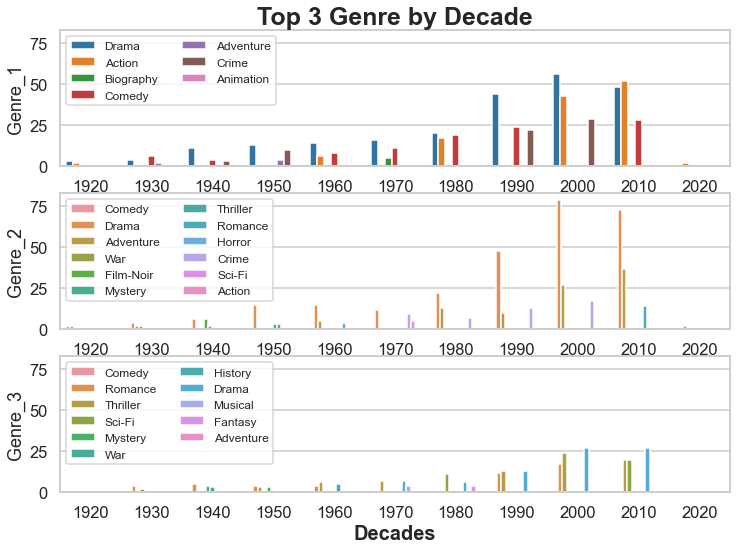

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,8.5), nrows=3, sharey=True)

sns.barplot(x='Decade',y='Genre_1',hue='level_1',data=df_top3_genre_1,ax=ax1)
sns.barplot(x='Decade',y='Genre_2',hue='level_1',data=df_top3_genre_2,ax=ax2)
sns.barplot(x='Decade',y='Genre_3',hue='level_1',data=df_top3_genre_3,ax=ax3)

ax1.set_title('Top 3 Genre by Decade', fontsize=25, fontweight ='bold')
ax3.set_xlabel('Decades', fontsize=20, fontweight ='bold')


ax1.legend(loc=2,ncol=2,fontsize='large')
ax2.legend(loc=2,ncol=2,fontsize='large')
ax3.legend(loc=2,ncol=2,fontsize='large')

## Findings, most common genres(not in any order) as
#### Genre1: Drama, Action, Comedy, Crime
#### Genre2: Drama, Adventure, Crime, Romance
#### Genre3: Drama, Thriller, Film_Noir, Sci-Fi

#### Q4. What were the trends of 'Average Gross Collection' & 'Total no. of Productions' of films of those 'popular genre and combinations' BY DECADES? (i.e. Drama+ other genres)

In [25]:
# create dataframes for all target genre & combinations
df_dra=df[df['Genre']==genre_5]
df_adv_dra=df[(df['Genre'].str.contains(genre_1))&(df['Genre'].str.contains(genre_5))]
df_act_dra=df[(df['Genre'].str.contains(genre_2))&(df['Genre'].str.contains(genre_5))]
df_com_dra=df[(df['Genre'].str.contains(genre_3))&(df['Genre'].str.contains(genre_5))]
df_cri_dra=df[(df['Genre'].str.contains(genre_4))&(df['Genre'].str.contains(genre_5))]

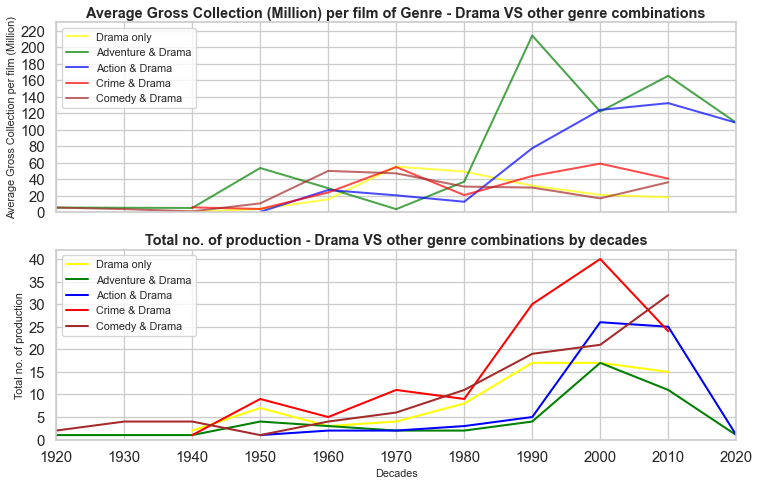

In [26]:
fig, (ax1, ax2) = plt.subplots(figsize=(13.5,8.5), nrows=2, dpi=65, sharex=True)

ax1.plot(df_dra.groupby('Decade')['Gross_Collection(Million)'].mean(),c='yellow',label='Drama only',alpha=0.7)
ax1.plot(df_adv_dra.groupby('Decade')['Gross_Collection(Million)'].mean(),c='green',label='Adventure & Drama',alpha=0.7)
ax1.plot(df_act_dra.groupby('Decade')['Gross_Collection(Million)'].mean(),c='blue',label='Action & Drama',alpha=0.7)
ax1.plot(df_cri_dra.groupby('Decade')['Gross_Collection(Million)'].mean(),c='red',label='Crime & Drama',alpha=0.7)
ax1.plot(df_com_dra.groupby('Decade')['Gross_Collection(Million)'].mean(),c='brown',label='Comedy & Drama',alpha=0.7)
ax1.set_title('Average Gross Collection (Million) per film of Genre - Drama VS other genre combinations',fontsize=16,fontweight ='bold')

ax2.plot(df_dra.groupby('Decade')['Count'].sum(),color='yellow',label='Drama only')
ax2.plot(df_adv_dra.groupby('Decade')['Count'].sum(),color='green',label='Adventure & Drama')
ax2.plot(df_act_dra.groupby('Decade')['Count'].sum(),color='blue',label='Action & Drama')
ax2.plot(df_cri_dra.groupby('Decade')['Count'].sum(),color='red',label='Crime & Drama')
ax2.plot(df_com_dra.groupby('Decade')['Count'].sum(),color='brown',label='Comedy & Drama')
ax2.set_title('Total no. of production - Drama VS other genre combinations by decades',fontsize=16,fontweight ='bold')

plt.xlim(1920,2020)
plt.xticks(range(1920,2030,10))
plt.xlabel('Decades',fontsize=12)
ax1.set_yticks(range(0,230,20))
ax1.set_ylim(0,230)
ax1.legend(fontsize='large')
ax1.set_ylabel('Average Gross Collection per film (Million)',fontsize=12)

ax2.set_yticks(range(0,42,5))
ax2.set_ylim(0,42)
ax2.legend(fontsize='large')
ax2.set_ylabel('Total no. of production',fontsize=12)

plt.show()

## Findings
#### Films that were only in 'Drama' genre reached it's peak of 'average gross collection' in 1970's with a relatively low no. of productions, but then even with stable increments(4 in 1970's, 8 in 1980's, 17 in 1990's and 2000's) in productions, the average gross collection had decreased for more than half in the same 30-year period, along with rapid rise of average gross collection of 'Adventure & drama' & 'Action & Drama' films from 1970's to 2000's.

#### We can assume that audiences might have become more economically affordable on films as a form of entertainment, or change their preference on platform to from offline to online overall, and even had been having higher demand on genre preferences on films, i.e. more complex combinations of genre/elements of contents instead of one genre alone.

#### Even though more films were in the 'Crime&Drama' among all genre combinations in 1990's - 2010's, 'Adventure & Drama' gave significantly much higher 'Average gross collection per film'. 

####  'The Lion king' (was also an anime, see below) had a higher IMDB rating, much higher no. of votes & gross collection, and a significantly shorter runtime among all 'Adventure & Drama' films.

In [27]:
cols_2=['Ranking','Movie_Name','Year','Runtime(Minutes)','Genre','Rating','Votes','Gross_Collection(Million)']
df_adv_dra[df_adv_dra['Decade']==1990].sort_values('Gross_Collection(Million)',ascending=False)[cols_2]

,Ranking,Movie_Name,Year,Runtime(Minutes),Genre,Rating,Votes,Gross_Collection(Million)
47,48,The Lion King,1994,88.0,"Animation, Adventure, Drama",8.5,1031212,422.78
404,405,Dances with Wolves,1990,181.0,"Adventure, Drama, Western",8.0,262093,184.21
838,839,Apollo 13,1995,140.0,"Adventure, Drama, History",7.7,290985,173.84
847,848,The Last of the Mohicans,1992,112.0,"Action, Adventure, Drama",7.7,166945,75.51


#### +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

#### 'The Dark Knight' gave significantly higher 'votes' & 'gross collection' than 'Lion King', and was the highest in these two features among 40 'Crime & Drama' films in 2000's.
#### 'Crime & Drama' films have become the most common genre combination, with it's rapid rise on 'Total no. of productions' since 1990's (from graph), however, most 'Crime & Drama' films had significantly lower amounts of gross collection & far lower rankings(3rd, 23rd & 42nd VS 158th & below, see below) compared to the top 3 films from the same genre combination.

In [28]:
df_cri_dra[df_cri_dra['Decade']==2000][cols_2].head(10)

,Ranking,Movie_Name,Year,Runtime(Minutes),Genre,Rating,Votes,Gross_Collection(Million)
2,3,The Dark Knight,2008,152.0,"Action, Crime, Drama",9.0,2574810,534.86
22,23,City of God,2002,130.0,"Crime, Drama",8.6,744265,7.56
41,42,The Departed,2006,151.0,"Crime, Drama, Thriller",8.5,1293859,132.38
157,158,No Country for Old Men,2007,122.0,"Crime, Drama, Thriller",8.2,947369,74.28
162,163,Batman Begins,2005,140.0,"Action, Crime, Drama",8.2,1435095,206.85
166,167,Kill Bill: Vol. 1,2003,111.0,"Action, Crime, Drama",8.2,1089976,70.10
246,247,Color It Yellow,2006,167.0,"Comedy, Crime, Drama",8.1,118386,2.20
254,255,Memories of Murder,2003,131.0,"Crime, Drama, Mystery",8.1,175596,0.01
257,258,Catch Me If You Can,2002,141.0,"Biography, Crime, Drama",8.1,946682,164.62
360,361,Slumdog Millionaire,2008,120.0,"Crime, Drama, Romance",8.0,836053,141.32


#### Q5. Any correlations among features of films of those 'popular genre and combinations'?

In [30]:
# create new columns 'Genre_comb' from rows of films of top genre combinations with 'Drama'
df_dra.loc[:,'Genre_Comb']='Drama'
df_adv_dra.loc[:,'Genre_Comb']='Adventure & Drama'
df_act_dra.loc[:,'Genre_Comb']='Action & Drama'
df_com_dra.loc[:,'Genre_Comb']='Comedy & Drama'
df_cri_dra.loc[:,'Genre_Comb']='Crime & Drama'
print(df_dra.shape[0], df_adv_dra.shape[0], df_act_dra.shape[0], df_com_dra.shape[0], df_cri_dra.shape[0])

73 46 65 104 129


In [31]:
# concate all df into 1
df_dra_all=pd.concat([df_dra, df_adv_dra, df_act_dra, df_com_dra, df_cri_dra],ignore_index=True)

In [32]:
# some other findings
print(df_dra_all[df_dra_all.groupby('Movie_Name')['Movie_Name'].transform('size') > 1].shape[0], 'films had more than 1 genre combination.')
print('E.g., a film that is in "Action, Comedy, Drama" genre has been split into "Action & Drama" & "Comedy & drama" rows in the dataframe.')

100 films had more than 1 genre combination.
E.g., a film that is in "Action, Comedy, Drama" genre has been split into "Action & Drama" & "Comedy & drama" rows in the dataframe.


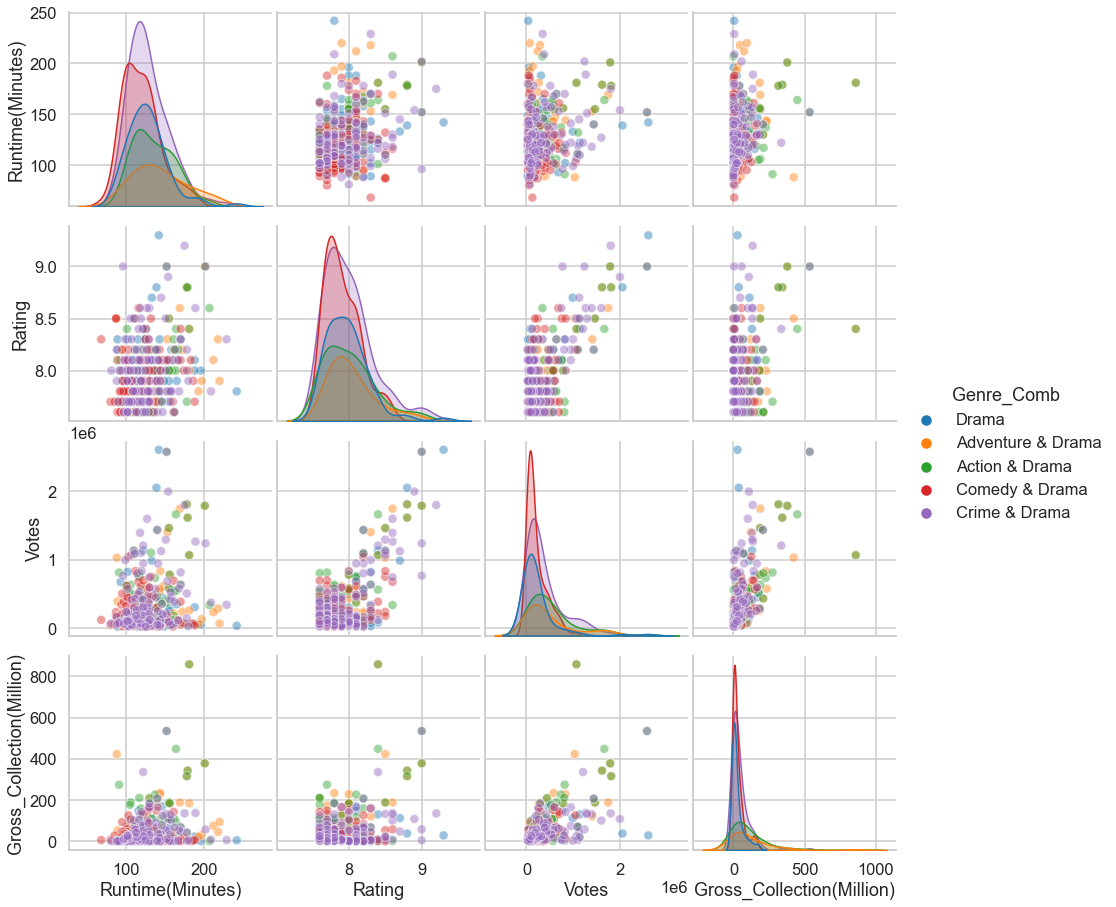

In [33]:
sns.pairplot(df_dra_all[['Runtime(Minutes)','Rating','Votes','Gross_Collection(Million)','Genre_Comb']],hue='Genre_Comb',plot_kws={'alpha':0.45,'linewidth':1},height=3.2)

## Findings
#### From the histograms above, for those films of 'popular genre and combinations', most of the data had similar distributions(i.e. distributions overlapped) 
#### From the scatter plots above, only a few films had weak correlations between 'Votes' & 'Rating'

## *iii. In terms of Directors:*
#### Q6. What were the 'Average IMDB Rating' VS 'Total no. of films directed' for each director? any correlation between them?

In [34]:
# 'average rating' & 'total no. of films directed' by director
df_rate_dir=df.groupby('Director').agg({'Rating':'mean','Count':'sum'}).sort_values(by='Rating',ascending=False)
df_rate_dir['Rating']=round(df_rate_dir['Rating'],2)
df_rate_dir.columns=['Ave_Rating','Film Counts']
df_rate_dir

,Ave_Rating,Film Counts
Director,,
Frank Darabont,8.95,2
Irvin Kershner,8.70,1
Lana Wachowski,8.70,1
Fernando Meirelles,8.60,1
Roberto Benigni,8.60,1
...,...,...
Jonathan Levine,7.60,1
Georges Franju,7.60,1
Aneesh Chaganty,7.60,1


r^2 = 0.044


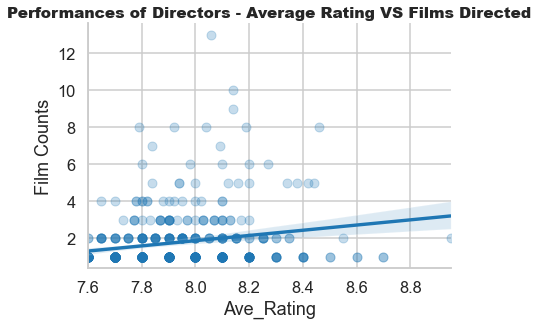

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(6.5, 4.5)

x=df_rate_dir['Ave_Rating']
y=df_rate_dir['Film Counts']

# plot data
sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.25})
ax.set_title('Performances of Directors - Average Rating VS Films Directed', fontsize=15.5, fontweight ='heavy')

# compute r^2 value
lin_reg = LinearRegression().fit(df_rate_dir[['Ave_Rating']],y)
r2 = lin_reg.score(df_rate_dir[['Ave_Rating']],y)

print(f'r^2 = {round(r2,3)}')
sns.despine()

plt.show()

### Since r^2 = 0.044, there is no strong correlation between 'Total no. of films directed' and 'average rating'.
#### That means the number of production of films by a director had no obvious effect on the film quality, i.e. some directors may have only directed 1-2 films that represented their peak performance in their careers with high ratings(>=8.6), while some directors have directed more than 8 films in total but their average rating fell between 8.0-8.2.

#### Q7. Compared to other films, did 'films that the directors also acted in' get either higher IMDB ratings or higher Gross Collection? or tend to have higher or shorter runtime?

In [36]:
# add a new column to mark if the directors also acted in the film
def dir_also_act(x):
    if (x['Director']==x['Actor_1'])|(x['Director']==x['Actor_2'])|(x['Director']==x['Actor_3']):
        return 1
    else:
        return 0

In [37]:
df.loc[:,'Director_Acted'] = df.apply(dir_also_act,axis=1)
df['Director_Acted'].value_counts()

0    783
1     34
Name: Director_Acted, dtype: int64

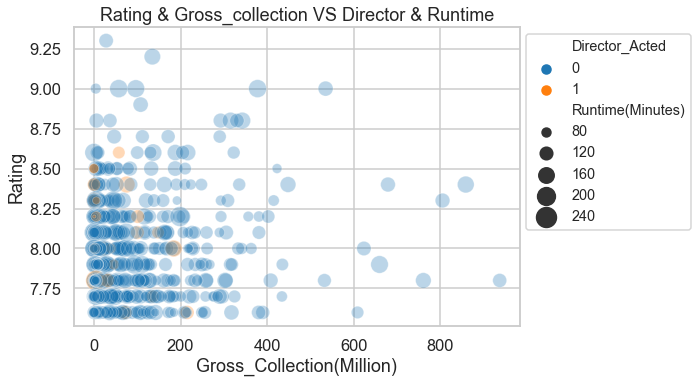

In [38]:
plt.figure(figsize=(8, 5.5))
sns.scatterplot(data=df, x='Gross_Collection(Million)', y='Rating', 
                alpha=0.3, hue='Director_Acted', size='Runtime(Minutes)', sizes=(10, 400))
plt.title('Rating & Gross_collection VS Director & Runtime')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1),fontsize='x-large')

## Findings
#### The fact that 'whether the director also acted in the film' had no direct effect on either IMDB ratings or Gross Collections, as 'films that the directors also acted'(orange data points) do not have outstanding positions(e.g. far right/far top) in the scatter plot above. 

#### Q8. Back to 'popular genre and combinations', Did they tend to get either higher IMDB ratings or higher Gross Collection than other films overall?

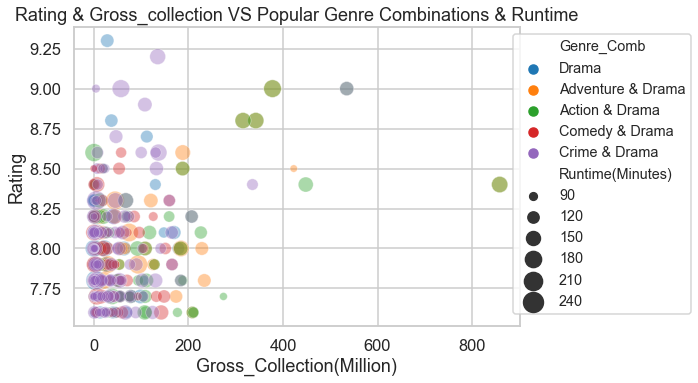

In [39]:
plt.figure(figsize=(8, 5.5))
sns.scatterplot(data=df_dra_all, x='Gross_Collection(Million)', y='Rating', 
                alpha=0.4, hue='Genre_Comb', size='Runtime(Minutes)', sizes=(10, 400))
plt.title('Rating & Gross_collection VS Popular Genre Combinations & Runtime')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1),fontsize='x-large')

## Findings
#### Even though 3 of the 'Action & Drama' films got higher Gross Collection of ~300-400 Million (with 1 outliner on the far right, >800 Million), & 4 of the 'Crime & Drama' films got IMDB ratings higher than 8.75, most of the others clustered in the bottom left of the graphs.

## "so what actually mattered?"
#### Well, what you as an actor or a director want to achieve, high rating? or high profit? or popularity alone i.e. votes? or your own preferences of genres? 

#### IMDB ratings might have been relative to genre of films or other features, apart from the features used in this analysis, we may have to dig deeper into other features, such as the keywords/content of description(about) or even actors of the films to see if they have some extent of correlations with ratings and gross collections. Apart from that, It might also have been dependent on the originality of ideas of writers/directors, as well as acting of actors.